In [ ]:
from Definitions import basefolder
import time
import numpy as np
from Finder_1d import Finder_1d
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import seaborn as sns
from sklearn.cluster import DBSCAN
from Clustering_CAML import Clustering_CAML
import h5py
from DbscanLoop import DbscanLoop
from sklearn.neighbors import NearestNeighbors
import pickle
import pandas as pd

In [ ]:
def PlotScatter(XC_,labels=[],filename_add=""):
    
#    XC_ = XC[mark];
    if(labels == []):
        labels = -1*np.ones((len(XC_),));
    
    fig,ax = plt.subplots(1,1,figsize=(12,12)); 
       
    mark_ = (labels==-1);
    ax.scatter(x=XC_[mark_,0],y=XC_[mark_,1],s=.4,c='grey',alpha=0.1);

    mark_ = (labels>=0);
    sns.scatterplot(x=XC_[mark_,0],y=XC_[mark_,1],hue=labels[mark_],palette='deep',linewidth=0,
                    s=2,legend=False,ax=ax);
    ax.set_aspect('equal');
    plt.savefig(outputfolder+"results_"+analysis_name+"_"+filename_add+".pdf",bbox_inches="tight");
    
def Filter(XC,xmin,xmax,ymin,ymax):    
    mark = (XC[:,0]>xmin)*(XC[:,0]<xmax)*(XC[:,1]>ymin)*(XC[:,1]<ymax);
    return np.unique(XC[mark,:],axis=0);    

In [ ]:
analysis_name = 'test1';
if(True):
    mainfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/';
    outputfolder = mainfolder + 'NoiseVsSignal/';    
    
    filename     = 'AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20';

    filename_noise  = mainfolder + filename + "_X_noise.txt";
    filename_signal = mainfolder + filename + "_X_signal.txt";    

    xmin = 100; 
    xmax = 180;
    ymin = 370;
    ymax = 400;
#elif(False):
#    outputfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/';
#    filename     = outputfolder +'XC_red.txt'
#    datascale    = 1; #=81/512*1000
#    #Define window to analyse
#    xInt = [0,np.Infinity];
#    yInt = [0,np.Infinity];

In [ ]:

XC_noise  = np.loadtxt(filename_noise);
XC_signal = np.loadtxt(filename_signal);

XC_noise        = Filter(XC_noise,xmin,xmax,ymin,ymax);
XC_signal       = Filter(XC_signal,xmin,xmax,ymin,ymax);

#XC_noise  = XC_noise[:5000,:]
#XC_signal = XC_signal[:5000,:]

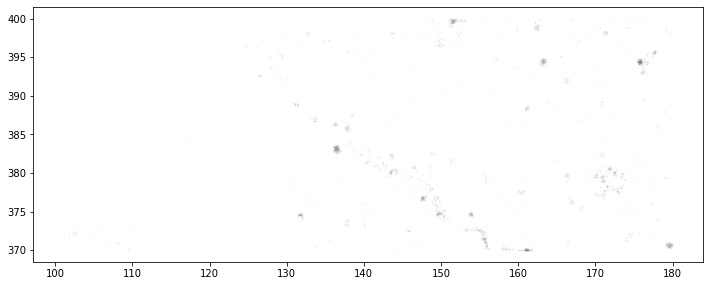

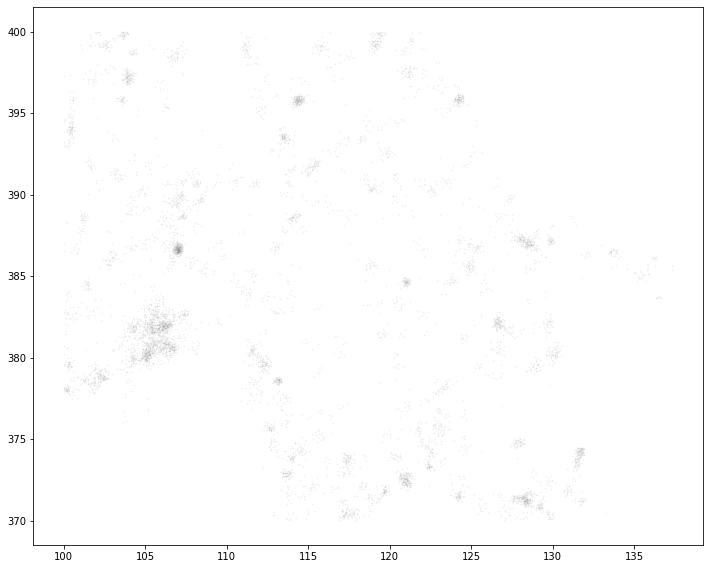

In [5]:
PlotScatter(XC_noise)
PlotScatter(XC_signal)

In [6]:
FD_noise = Finder_1d(algo="DbscanLoop");
labels   = FD_noise.fit(XC_noise,XC_signal,skipSimilarityScore=True); 

Analysing 1895 points
Boundaries for sigma    : 0.10130794660423191 , 0.7507150536155135
Progress: |██████████████████████████████████████████████████| 100.0% Complete Complete
Computing clusters : 7.26
Skipping similarity score and computation of optimum


In [16]:
FD_signal = Finder_1d(algo="DbscanLoop");
labels    = FD_signal.fit(XC_signal,skipSimilarityScore=True); 

Analysing 6766 points
Boundaries for sigma    : 0.10130794660423191 , 0.7507150536155135
Progress: |██████████████████████████████████████████████████| 100.0% Complete Complete
Computing clusters : 61.36
Skipping similarity score and computation of optimum


In [27]:
(sim_noise)

array([171, 188, 183])

sigma                                                 0.367131
threshold                                                  7.0
labels       [-1, -1, -1, 0, -1, 1, -1, 2, -1, 0, 0, 0, -1,...
time                                                  0.673195
Name: 130, dtype: object
sigma                                                 0.367131
threshold                                                  7.0
labels       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
time                                                  0.052397
Name: 130, dtype: object
sigma                                                 0.367131
threshold                                                  7.0
labels       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
time                                                  0.052397
Name: 130, dtype: object


<ipython-input-2-e961edbe0cb0>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):
<ipython-input-2-e961edbe0cb0>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):


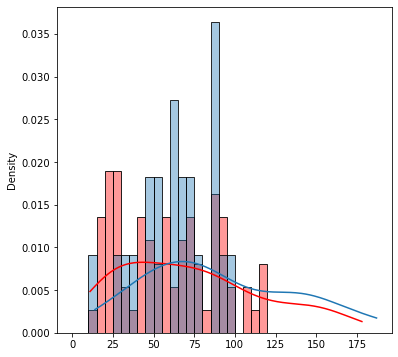

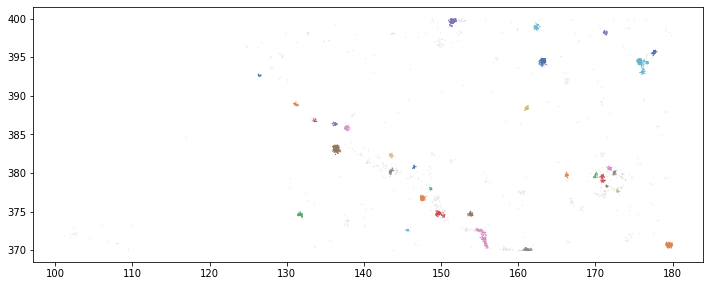

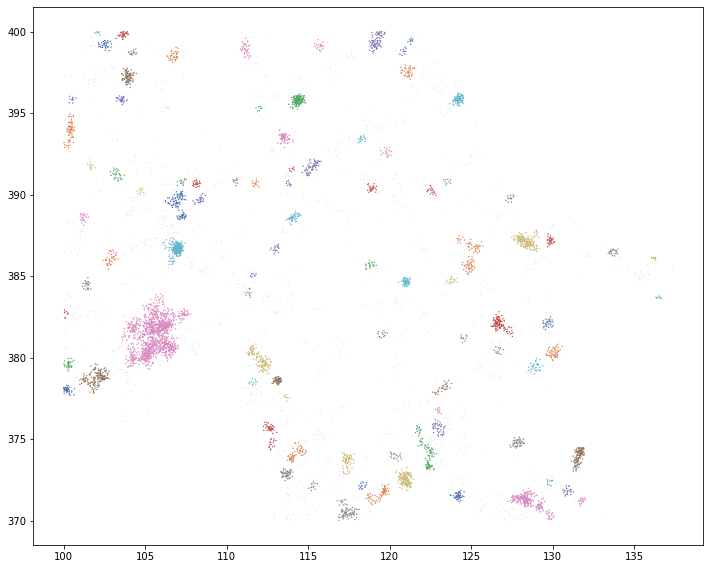

In [30]:
idx = 130;
sim_signal = (FD_signal.getSimilarityScoreDistribution(XC_signal,idx));
sim_noise  = (FD_noise.getSimilarityScoreDistribution(XC_noise,idx));

fig,ax = plt.subplots(1,1,figsize=(6,6)); 
bins = np.linspace(0,120,25);

print(FD_noise.phasespace.loc[idx,:])
sns.histplot(sim_signal,alpha=0.4,kde=True,ax=ax,stat='density',color='red',bins=bins)
sns.histplot(sim_noise,alpha=0.4,kde=True,ax=ax,stat='density',bins=bins)

PlotScatter(XC_noise,FD_noise.phasespace.loc[idx,'labels'])
PlotScatter(XC_signal,FD_signal.phasespace.loc[idx,'labels'])

In [ ]:
if(True):
    
    FD_signal = Finder_1d(algo="DbscanLoop");
    labels    = FD_signal.fit(XC_signal); 
    
    FD_noise = Finder_1d(algo="DbscanLoop");
    labels   = FD_noise.fit(XC_noise,XC_signal); 
    
    
    
    with open(outputfolder+"results_"+analysis_name+'_noise.pickle','wb') as handle:
        pickle.dump({'FD_noise':FD_noise,'FD_signal':FD_signal}, handle,protocol=pickle.HIGHEST_PROTOCOL)       
else:
    with open(outputfolder+"results_"+analysis_name+'.pickle', 'rb') as fr:
        FD_load = pickle.load(fr);
    FD_noise  = FD_load['FD_noise'];    
    FD_signal = FD_load['FD_signal'];        

In [ ]:
FD_noise = Finder_1d(algo="DbscanLoop");
labels   = FD_noise.fit(XC_noise,XC_signal)

In [ ]:
print(FD_noise.phasespace.loc[100,:])
print(FD_signal.phasespace.loc[100,:])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,6)); 
bins = np.linspace(0,120,25);
idx = 1;

print(FD_noise.phasespace.loc[idx,:])
sns.histplot(FD_noise.similarityScoreMatrix[idx,:],alpha=0.4,kde=True,ax=ax,stat='density',color='red',bins=bins)
sns.histplot(FD_signal.similarityScoreMatrix[idx,:],alpha=0.4,kde=True,ax=ax,stat='density',bins=bins)

In [ ]:
true_pos = np.zeros((len(FD_noise.phasespace)))
for idx in np.arange(len(true_pos)):
    thresh   = np.quantile(FD_noise.similarityScoreMatrix[idx,:],0.95);
    true_pos = np.sum(FD_)

In [ ]:
df1 = FD_signal.phasespace[['sigma', 'threshold','similarityScore']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()

In [ ]:
df1 = FD_noise.phasespace[['sigma', 'threshold','similarityScore']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()